In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
svm=svm.SVC()

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv("wineQuality.csv")

In [3]:
# dataset - datascructure description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#describing table heads in the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#describing tail of the dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [6]:
#describing shape of the dataset
df.shape

(4898, 12)

In [7]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1771,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.500000,6
2964,5.8,0.19,0.24,1.3,0.044,38.0,128.0,0.99362,3.77,0.60,10.600000,5
973,6.5,0.08,0.33,1.9,0.028,23.0,93.0,0.99100,3.34,0.70,12.000000,7
4637,6.0,0.24,0.41,1.3,0.036,42.0,118.0,0.99018,3.04,0.64,11.733333,6
4062,7.4,0.36,0.32,1.9,0.036,27.0,119.0,0.99196,3.15,0.49,11.200000,6


In [8]:
# checking if any null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#checkign for duplicated values
df.duplicated().sum()

937

In [10]:
#dropping the duplicate data for smooth ML training
df.drop_duplicates(inplace=True)

In [11]:
#checking dataset again after duplicates are dropped
df.shape

(3961, 12)

In [12]:
#re-checkign for duplicated values
df.duplicated().sum()

0

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


TARGET DATA VISUALIZATION

In [14]:
df.quality.value_counts() 

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

                            BINARIZATION OF DATA
converting the data value in binary object for easier prediction. 

if wine quality is less than 7 then 0 if greater than 6 then 1  indicating bad and good quality respectively

In [15]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [16]:
df["quality"]=[1 if x>=7 else 0 for  x in df["quality"]]

In [17]:
df.quality.unique()

array([0, 1], dtype=int64)

In [18]:
df.quality.value_counts() 

0    3136
1     825
Name: quality, dtype: int64

In [19]:
#create a separate objects for target and input features
target_name="quality"

#separate object for target feature
y = df[target_name]

#sepatate object for input feature
X = df.drop(target_name,axis=1)

In [20]:
y.sample(10)

2441    0
4708    0
3310    1
3021    0
2968    0
4017    0
326     0
780     0
2530    0
2560    0
Name: quality, dtype: int64

In [21]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,0.208281
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.406130
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,0.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


FEATURE SCALING

feature scaling refers to the process of scaling the features of a dataset so that they have similar ranges and are on the same scale. eg. without feature scaling ML model takes 7KM to be less than 1000m comparing the numbers thus the dataset are feature scaled to stand on the same magnitude. 

In [22]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [23]:
X

array([[ 0.18535197, -0.10188873,  0.20965146, ..., -1.28992816,
        -0.35548818, -1.47039574],
       [-0.6222624 ,  0.18817926,  0.04629365, ...,  0.68992438,
        -0.00309159, -0.89517431],
       [ 1.45446025, -0.0051994 ,  0.53636707, ...,  0.42594404,
        -0.44358733, -0.40212736],
       ...,
       [-0.39151544, -0.39195672, -1.17888992, ..., -1.35592325,
        -0.26738904, -0.9773488 ],
       [-1.54525024,  0.09148993, -0.28042197, ...,  0.95390472,
        -0.97218223,  1.81658387],
       [-0.96838284, -0.6820247 ,  0.37300927, ...,  0.42594404,
        -1.50077712,  0.99483897]])

In [24]:
X.shape , y.shape

((3961, 11), (3961,))

SPLITTING DATASET INTO TRAIN TEST VALIDATE

In [25]:
#splitting training and testing data with 70% training and 30% remaining data for validation and testing 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2772, 11), (1189, 11), (2772,), (1189,))

In [27]:
#again splitting the test data into 50% 50% test and validation data
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [28]:
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((2772, 11), (594, 11), (595, 11), (2772,), (594,), (595,))

USING RBF KERNEL  

In [29]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, y_train)

SVC()

In [30]:
print(model_rbf.score(X_val, y_val))

0.8050420168067227


USING LINEAR KERNEL it is the default kernel used by svm 

In [31]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
print(model_linear.score(X_val, y_val))

0.7798319327731092


UPON COMPARISION RBF KERNEL PROVED TO BE MORE ACCURATE IN THIS MODEL AS LINEAR=77% and RBF = 80%

--------------------------------------------------------------------------------------------------------------------------------

Set up the parameters to search through with GridSearchCV

In [33]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [34]:
grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy',cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [35]:
print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [36]:
#same result from above
print(grid_search.best_estimator_)

SVC(C=1, gamma=0.1)


This code creates a support vector machine (SVM) model using the best hyperparameters found by the grid_search object, which is a GridSearchCV object.

In [37]:
best_model = SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
best_model.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [38]:
accuracy = best_model.score(X_val,y_val)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [39]:
y_pred = best_model.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       479
           1       0.57      0.24      0.34       115

    accuracy                           0.82       594
   macro avg       0.71      0.60      0.62       594
weighted avg       0.79      0.82      0.79       594



CONFUSION MATRIX

In [41]:

# Generate predictions for the test set
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[458  21]
 [ 87  28]]


[[458  21]
 [ 87  28]]


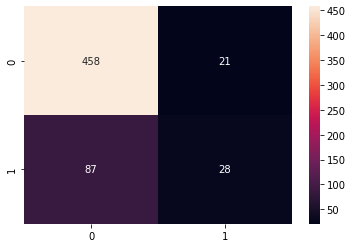

In [42]:

# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d')
print(cm)